This notebook plots the number of distinct users and jobs per month on the usegalaxy.eu instance

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import pandas as pd
from pathlib import Path

In [2]:
color1 = "#eaac88" #"#d4c6af"
color2 = "#79dd88"

In [3]:
figure_dp = Path("../figures/")
figure_dp.mkdir(parents=True, exist_ok=True)

data_dp = Path("../data/")
data_dp.mkdir(parents=True, exist_ok=True)

In [4]:
df = pd.read_csv(data_dp / Path("usegalaxy_eu_stats.csv"), parse_dates=["Months"])

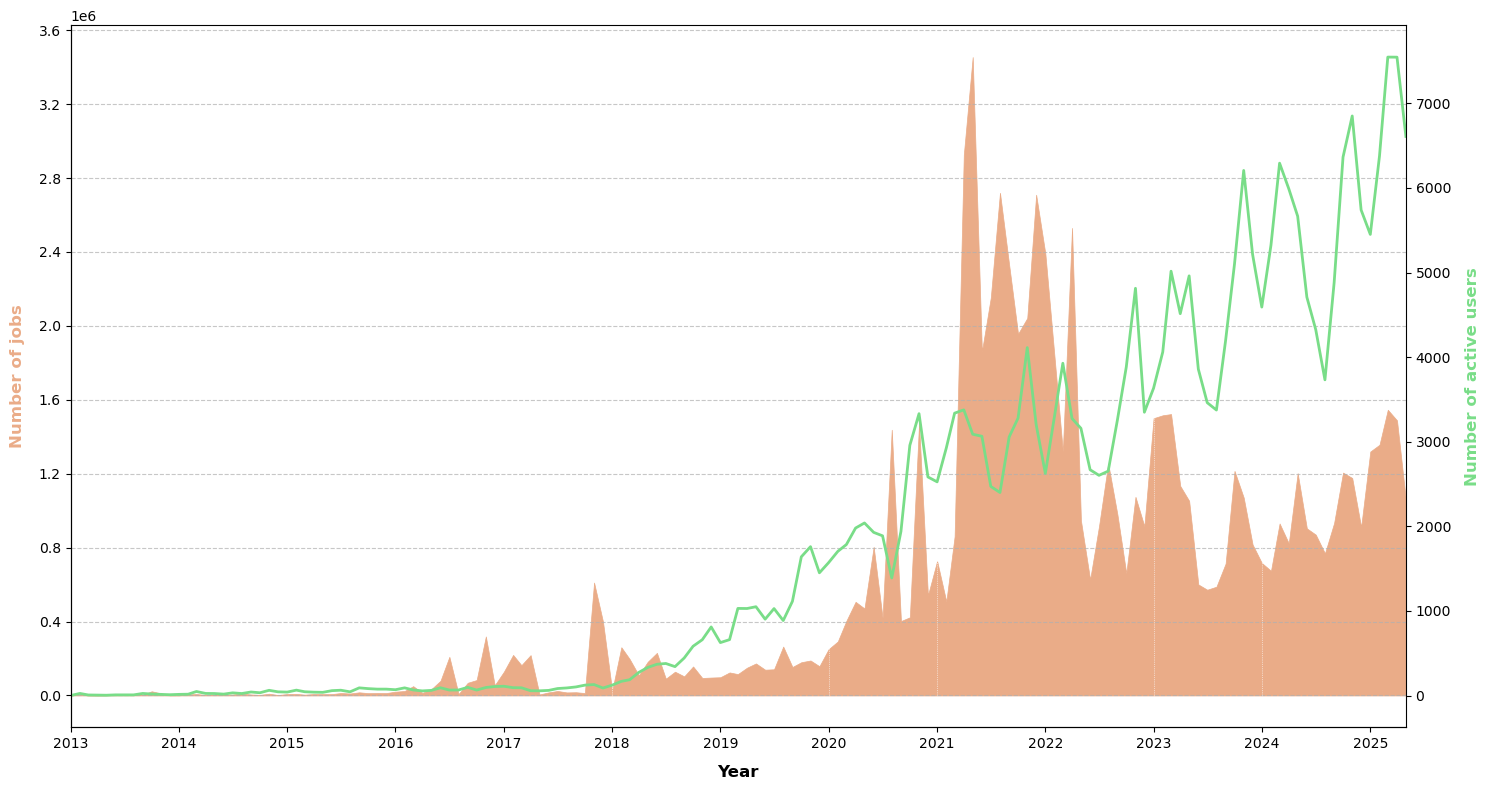

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))

# Plot bars for "Number of jobs"
ax.fill_between(
    df["Months"],
    df["Number of jobs"],
    color=color1,
    linewidth=0.5,
    label="Number of jobs"
)

# Plot line for "Number of active users"
ax2 = ax.twinx()
ax2.plot(
    df["Months"],
    df["Number of active users"],
    color=color2,
    linewidth=2,
    label="Number of active users"
)

# Vertical lines for specific years
for year in [2018, 2020, 2021, 2023, 2024]:
    ax.axvline(x=pd.to_datetime(f"{year}-01-01"), color='white', linestyle='dotted', linewidth=0.5)

# X and Y axis formatting
ax.set_xlim(df["Months"].min(), df["Months"].max())
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xlabel("Year", fontsize=12, fontweight='bold', labelpad=10)
ax.set_ylabel("Number of jobs", fontsize=12, fontweight='bold', labelpad=10, color=color1)
ax2.set_ylabel("Number of active users", fontsize=12, fontweight='bold', labelpad=10, color=color2)

# Y-axis ticks
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
ax2.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Grid
ax.grid(axis='y', linestyle='dashed', alpha=0.7, which='both')
ax.grid(axis='x', which='both', visible=False)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Theme
ax.set_facecolor('white')
ax2.set_facecolor('white')
fig.patch.set_facecolor('white')

# Layout
plt.tight_layout()

# Save as PNG
fig.savefig(figure_dp / "jobs_and_users.png", dpi=300, bbox_inches='tight')

plt.show()